In [1]:
import requests
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
import json
import urllib.request

# Using APIs to Train Models

In [2]:
YELP_TOKEN = " "
yelp_fusion_api_key = {'Authorization': 'Bearer %s' % YELP_TOKEN}

In [3]:
toronto_business = []
review_labels = []

endpoint = 'https://api.yelp.com/v3/businesses/search?location=toronto' 
for i in range(0,100,50):
    r = requests.get(endpoint+'&limit=50&offset='+str(i), headers=yelp_fusion_api_key)
    r.json()
    for business in r.json()['businesses']:
        reviews = requests.get("https://api.yelp.com/v3/businesses/%s/reviews" % business['id'], headers={"Authorization": "Bearer %s" % YELP_TOKEN}).json()
        for review in reviews['reviews']:
            review_labels.append((review['text'].rstrip('.'), review['rating']))

    toronto_business.extend(json.loads(r.content)['businesses'])


# WebScraping

In [4]:
review_list = []
rating_list  =[]


for bus in toronto_business:
    url = 'https://www.yelp.ca/biz/'+bus['alias']
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')

    regex = re.compile('.*review.*')
    results = soup.find_all('div', {'class':regex})

    for result in results:

        regex3 = re.compile('.*comment.*')
        comments = result.find_all('p',{'class':regex3})
   
        text = [comment.text for comment in comments]
        review_list.append(text[0])
       


        regex2 = re.compile('.*i-stars.*')
        ratings = result.find_all('div',{'class':regex2})
        star = [item.attrs['aria-label'] for item in ratings]
        rating_list.append(star[0])
   
   

    # for item in reviews:
        
    # items = soup.find_all('div',attrs={'class':'container__09f24__sxa9-'})
    # rating = item.find_all('div',attrs={'class':'i-stars__09f24___sZu0'})['aria-label']
    # print(rating)


# div class=" i-stars__09f24__foihJ i-stars--regular-5__09f24__fJwXW border-color--default__09f24__NPAKY overflow--hidden__09f24___ayzG" aria-label="5 star rating" 
    # regex2 = re.compile('.*i-stars.*')
    # ratings = soup.find_all('div',{'class':regex2})
    # star = [item.attrs['aria-label'] for item in ratings]
    # rating_list.append(star)
print(len(rating_list))
print(len(review_list))


990
990


In [5]:
#Converting rating list to float
num_rating_list =[]
for x in rating_list:
    num_rating_list.append(float(x.split()[0]))
num_rating_list

[4.0,
 4.0,
 5.0,
 4.0,
 5.0,
 4.0,
 4.0,
 5.0,
 4.0,
 4.0,
 3.0,
 5.0,
 4.0,
 4.0,
 5.0,
 4.0,
 4.0,
 4.0,
 5.0,
 4.0,
 5.0,
 4.0,
 4.0,
 3.0,
 5.0,
 4.0,
 4.0,
 4.0,
 2.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 3.0,
 3.0,
 4.0,
 4.0,
 5.0,
 4.0,
 4.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 2.0,
 1.0,
 3.0,
 5.0,
 4.0,
 5.0,
 4.0,
 4.0,
 5.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 4.0,
 4.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 3.0,
 5.0,
 4.0,
 4.0,
 3.0,
 3.0,
 5.0,
 5.0,
 4.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 2.0,
 4.0,
 3.0,
 4.0,
 5.0,
 5.0,
 4.0,
 3.0,
 4.0,
 4.0,
 3.0,
 1.0,
 1.0,
 2.0,
 4.0,
 5.0,
 4.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 2.0,
 4.0,
 4.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 3.0,
 5.0,
 5.0,
 4.0,
 5.0,
 3.0,
 4.0,
 5.0,
 4.0,
 1.0,
 5.0,
 5.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 3.0,
 2.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 3.0,
 5.0,
 4.0,
 3.0,
 5.0,
 1.0

In [6]:
merged_list = list(zip(review_list, num_rating_list)) 
# merged_list

# Classification

In [7]:
len(merged_list)

990

In [8]:
review_features = [(x.split(' '), 'positive' if y > 3 else 'negative') for (x, y) in  merged_list]
review_features

[(['Pretty',
   'authentic',
   'thai',
   'food',
   'in',
   'Toronto!',
   'Some',
   'dishes',
   'are',
   'a',
   'little',
   'too',
   'salty',
   '(the',
   'Tom',
   'Yum',
   'was',
   'too',
   'salty',
   'for',
   'me),',
   'but',
   'everything',
   'was',
   'quite',
   'delicious.',
   'Pai',
   'is',
   'well',
   'known',
   'and',
   'has',
   'gained',
   'a',
   'lot',
   'of',
   'probability',
   'in',
   'recent',
   'years',
   'and',
   'now',
   'reservations',
   'are',
   'pretty',
   'difficult',
   'to',
   'make!',
   'Not',
   'sure',
   'if',
   'the',
   'food',
   'if',
   'worth',
   'the',
   'line-up,',
   'but',
   'it',
   'is',
   'delicious.',
   'There',
   'are',
   'just',
   'other',
   'thai',
   'restaurants',
   'in',
   'the',
   'city',
   'that',
   'are',
   'just',
   'as',
   'delicious',
   'with',
   'no',
   'line.'],
  'positive'),
 (['A',
   'quintessential',
   'Thai',
   'place',
   'in',
   'Toronto.',
   'Reliable',
   

In [9]:
from nltk.sentiment import SentimentAnalyzer
import nltk.sentiment.util
from nltk.classify import NaiveBayesClassifier
import random


random.shuffle(review_features)
training_docs = review_features[:120]
test_docs = review_features[120:]

print("Training: %d, Testing: %d" % (len(training_docs), len(test_docs)))

sentim_analyzer = SentimentAnalyzer()

Training: 120, Testing: 870


In [10]:
all_words_neg = sentim_analyzer.all_words([nltk.sentiment.util.mark_negation(doc) for doc in training_docs])
all_words_neg

['When',
 'we',
 'went,',
 'pre-pandemic,',
 'it',
 'was',
 'packed',
 'to',
 'the',
 'gills',
 'with',
 'many',
 'children',
 'running',
 'around.',
 'There',
 'are',
 'cool',
 'walkways',
 'you',
 'can',
 'stand',
 'on',
 'that',
 'move',
 'you',
 'through',
 'underwater',
 'tunnels',
 'where',
 'you',
 'can',
 'watch',
 'sharks,',
 'turtles,',
 'and',
 'fish',
 'swimming',
 'overhead.',
 'There',
 'is',
 'also',
 'a',
 'section',
 'where',
 'you',
 'can',
 'pet',
 'stingrays.',
 'Other',
 'than',
 'that,',
 'and',
 'the',
 'psychedelic',
 'lights,',
 'I',
 "can't",
 'say_NEG',
 'there_NEG',
 'is_NEG',
 'much_NEG',
 'to_NEG',
 'distinguish_NEG',
 'it_NEG',
 'from_NEG',
 'other_NEG',
 'aquariums_NEG',
 'I_NEG',
 'have_NEG',
 'been_NEG',
 'to._NEG',
 'A_NEG',
 'note_NEG',
 'of_NEG',
 'caution:_NEG',
 'their_NEG',
 'parking_NEG',
 'garage_NEG',
 'will_NEG',
 'run_NEG',
 'you_NEG',
 'around_NEG',
 '$30,_NEG',
 'with_NEG',
 'no_NEG',
 'price_NEG',
 'listed_NEG',
 'when_NEG',
 'you_NEG',
 

In [11]:
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
sentim_analyzer.add_feat_extractor(nltk.sentiment.util.extract_unigram_feats, unigrams=unigram_feats)

In [12]:
training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(test_docs)

In [13]:
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
     print('{0}: {1}'.format(key, value))

Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy: 0.725287356321839
F-measure [negative]: 0.2949852507374631
F-measure [positive]: 0.8294075660242682
Precision [negative]: 0.26455026455026454
Precision [positive]: 0.8531571218795888
Recall [negative]: 0.3333333333333333
Recall [positive]: 0.8069444444444445


<BarContainer object of 5 artists>

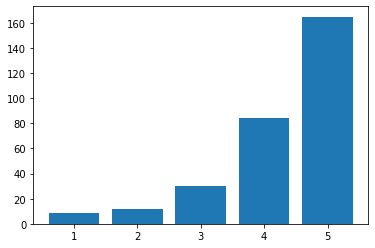

In [14]:
from collections import defaultdict

c = defaultdict(int)
for x in review_labels:
    c[x[1]] += 1

plt.bar(c.keys(), c.values())